<a href="https://colab.research.google.com/github/IvanStukalov/MLTechnologies/blob/lab_1/udemy_courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных. Исследование и визуализация данных.
# Курсы Udemy

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать [набор курсов с платформы udemy](https://www.kaggle.com/datasets/andrewmvd/udemy-courses)

Датасет состоит из файла *udemy_courses.csv*

Каждый файл содержит следующие колонки:

* course_id - id курса
* course_title - название курса на udemy
* url - url адрес страницы с курсом
* is_paid - оплачиваемый ли курс (true/false)
* price - цена за курс в год в $. Если курс не оплачивемый, то цена равна 0.
* num_subscribers - количество подписчиков на курс
* num_reviews - количество просмотров курса
* num_lectures - количество лекций на курсе
* level - уровень сложности курса
* content_duration - общая продолжительность курса (в часах)
* published_timestamp - дата публикации курса
* subject - тема курса
 - business finance
 - grafic design
 - musicial instruments
 - web development

### Импорт библиотек

Импортируем библиотеки с помощью команды import.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

In [ ]:
df=pd.read_csv('./sample_data/udemy_courses.csv')

## 2) Основные характирики датасета

Общая информация о датасете:
* столбцы
* тип значения
* количество ненулевых значений в каждом столбце
* размер датасета


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
df.shape

(3678, 12)

3678 строк, 12 столбцов

Посмотрим первые 8 строк датасета:

In [ ]:
df.head(8)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30T22:13:03Z,Business Finance


Посмотри, есть ли пустые значения в нашем датасете

In [ ]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Пустых значений нет ни в одном столбце

Посмотрим основные характеристики нашего датасета

In [ ]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


## 3) Визуальное исследование датасета

Количество платных и бесплатных подписчиков

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

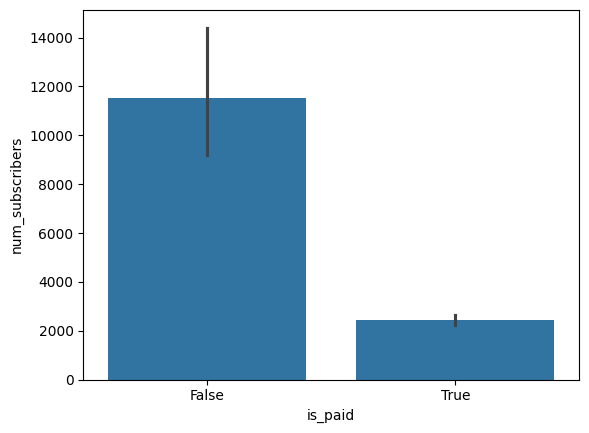

In [ ]:
sns.barplot(x=('is_paid'),y=('num_subscribers'),data=df)

Количество подписчиков на каждом из уровней

<Axes: xlabel='level', ylabel='num_subscribers'>

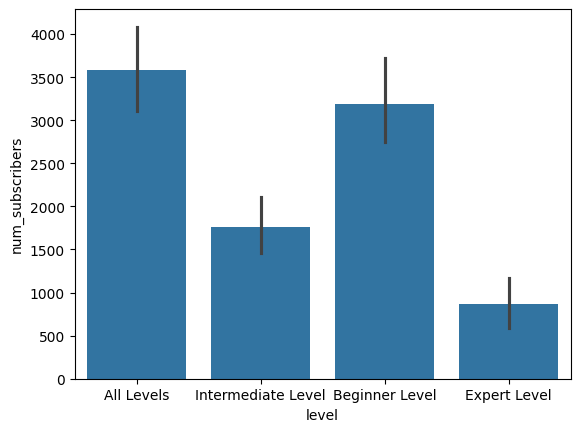

In [ ]:
sns.barplot(x=('level'),y=('num_subscribers'),data=df)

топ 10 курсов по количеству подписчиков

<Axes: xlabel='num_subscribers', ylabel='course_title'>

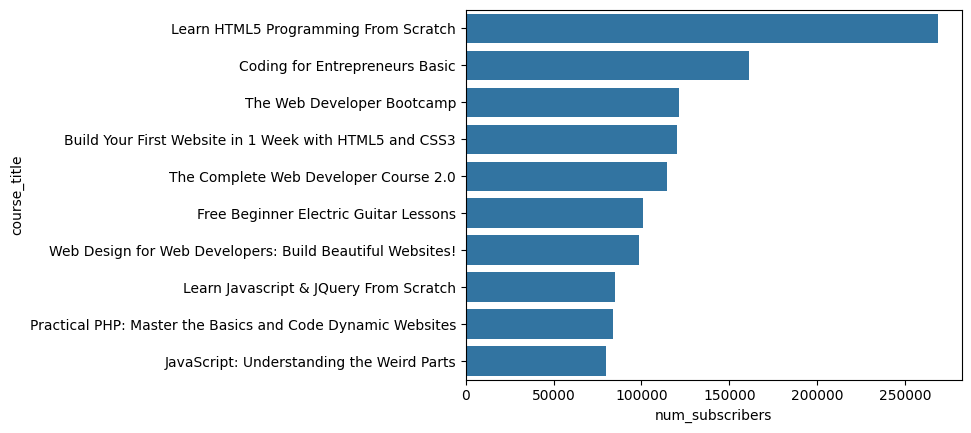

In [ ]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10)

Количество просмотров на каждой из тем курсов

<Axes: xlabel='subject', ylabel='num_reviews'>

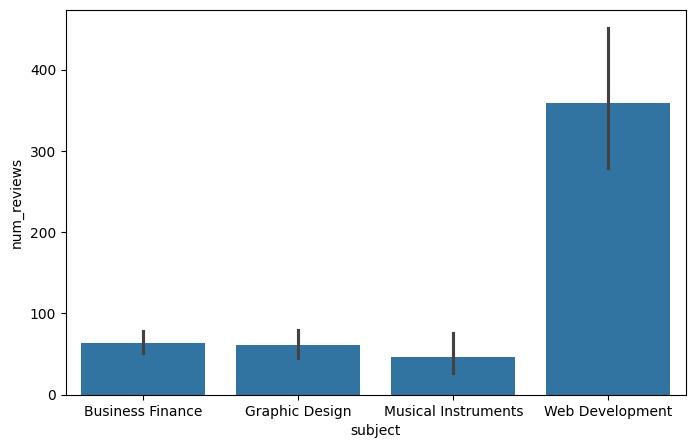

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='subject',y='num_reviews',data=df)

## 4) Информация о корреляции признаков

Посмотрим, какие признаки коррелируют между собой

In [ ]:
df.corr()

<ipython-input-63-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


<ipython-input-64-50ab9fb37538>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.3f')


<Axes: >

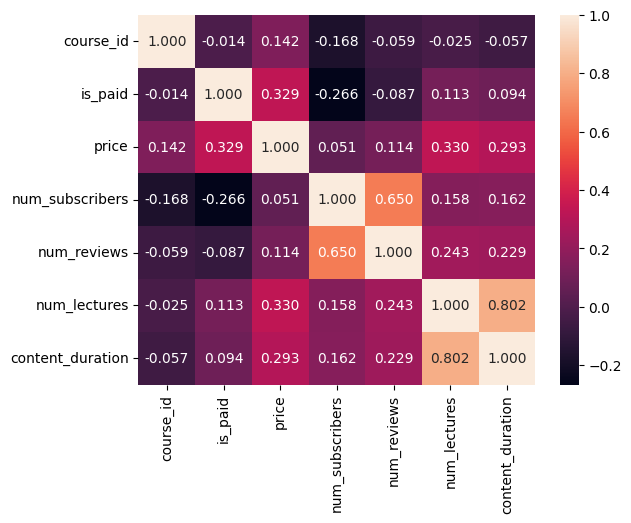

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.3f')

* Продолжительность контента прямо коррелирует с количеством лекций
* Количество просмотров прямо коррелирует с количеством подписчиков (можно сказать о популярности курса)
* количество подписчиков (слабо) обратно коррелирует с оплачиваемостью курса

<ipython-input-65-bd604dcd47bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
<ipython-input-65-bd604dcd47bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
<ipython-input-65-bd604dcd47bc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')


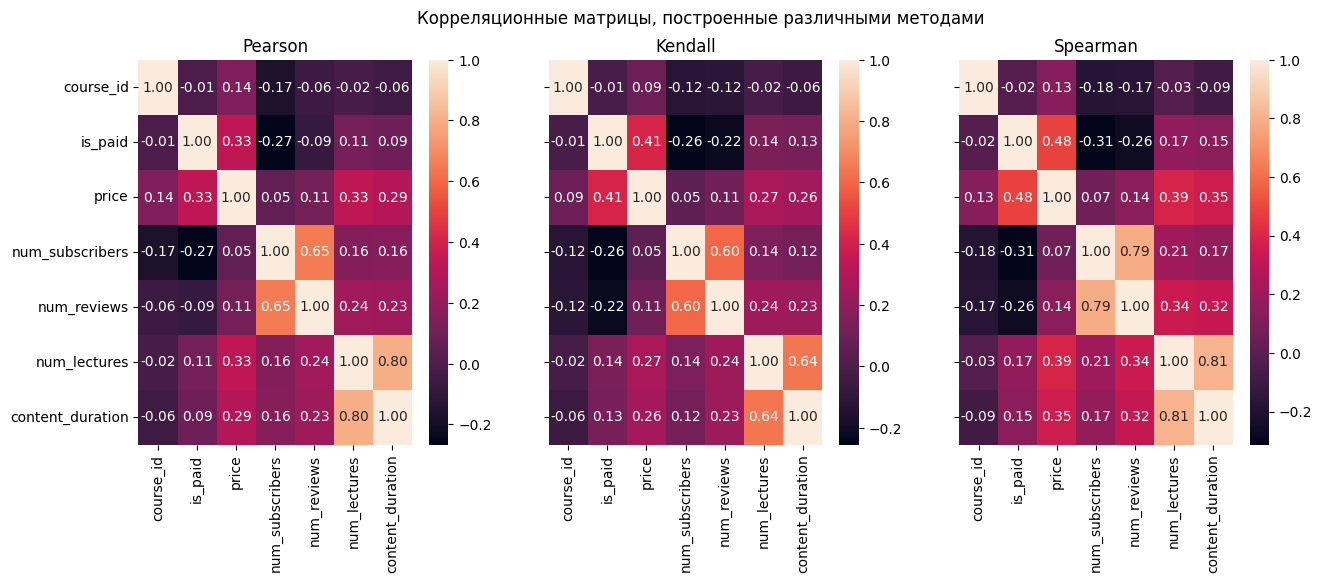

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')